### Dimensionality reduction using PCA

In [2]:
# Build PCA

In [3]:
# Why do we use dimensionality reduction
# Reason 1 - Space Efficeincy
# Reason 2 - Computing Efficiency
# Reason 3 - Visualization(easy to analyze by human eye)

# We will build PCA and compare it to T-SME and LDA (3 DR methods total)

In [5]:
import numpy as np #math
np.random.seed(1) #for debugging

In [17]:
#We'll first create 2 classes

#each with 3 features
# create class 1 random sampled 3 X 20 data set

mu_vec1 = np.array([0, 0, 0]) # sample mean
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
# Covariance means that how changes in one variable is associated to the changes in the other variable
# How this two variables are connected

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat, 20).T
print(class1_sample)
# 3 X 20 matrix - 3 columns with 20 rows

[[-0.42449279  1.01382247 -0.27584606 -1.15498263  1.01120706  1.03298378
  -0.87000822 -0.13971173 -1.63744959  0.10734329 -0.45994283  1.85300949
   0.37245685  1.1010002  -1.1134361  -0.02752939  0.14164054 -0.30912132
   0.03494359  0.98635218]
 [-0.73153098 -2.22711263  1.22895559 -0.1776322  -1.47656266 -0.22241403
   0.36919047  1.38631426  3.9586027  -1.39881282  0.64435367  0.14225137
  -0.1484898   0.78002714 -0.06741002  1.74643509 -2.51630386  0.51093777
   1.45391758 -0.46615486]
 [-1.56573815 -1.6993336   1.30970591 -1.51045638 -0.14319575  1.47016034
   0.85328219  0.54812958  0.64864364  0.08176782  0.37167029  0.51350548
  -0.1834002  -0.6294416   1.16143998 -0.77507029 -0.59566788  1.71066184
   0.66168108  1.38499134]]


In [19]:
# create class 2 random sampled 3 x 20 data set

mu_vec2 = np.array([0, 0, 0]) # sample mean
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
# Covariance means that how changes in one variable is associated to the changes in the other variable
# How this two variables are connected

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class2_sample)
# 3 X 20 matrix - 3 columns with 20 rows

[[-0.10646012 -0.97989025 -0.32905155  0.3166589   0.41026575  0.31965694
   0.15001628 -0.99601089  1.91979229  0.62743708 -0.92687194  0.13437312
   1.01855247 -0.4599301  -0.0593679   0.02599999 -0.36261209 -2.30490794
   0.28807817  0.80745592]
 [-2.79099641  0.69257435  1.34710546 -1.89526695  0.85987097  0.3181542
   0.46353432 -1.19586151 -1.39169388  0.75133724 -0.18242041 -0.2683713
   1.2305582  -0.79079995  1.4489894  -1.34869645 -1.48515645 -0.03181717
   1.49810818  0.31223869]
 [-0.45611756 -0.47867236 -1.04906775  0.08972912 -0.89868319 -0.01923163
   0.39788042  2.50598029  0.45021774  0.14039544 -0.49112514 -0.13167563
  -1.18110317  1.22372221 -0.47758085  1.30253554 -0.59246129  0.11248774
  -0.30097615 -0.19332164]]


Populating the interactive namespace from numpy and matplotlib


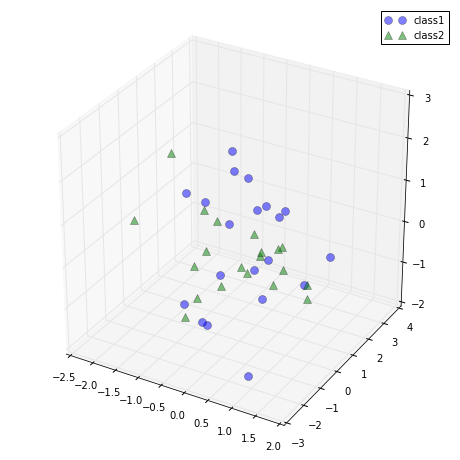

In [24]:
# Step 2 - Plot the data


%pylab inline

#plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#figure, width and height
fig = plt.figure(figsize=(8,8))

# 3d subplot
# these are subplot grid parameters encoded as a single integer 1X1 grid, 1st subplot
ax = fig.add_subplot(111, projection='3d')

# fontsize
plt.rcParams['legend.fontsize'] = 10

# Plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [25]:
# Step 3 - Merge the data into one big data set

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [26]:
all_samples

array([[-0.42449279,  1.01382247, -0.27584606, -1.15498263,  1.01120706,
         1.03298378, -0.87000822, -0.13971173, -1.63744959,  0.10734329,
        -0.45994283,  1.85300949,  0.37245685,  1.1010002 , -1.1134361 ,
        -0.02752939,  0.14164054, -0.30912132,  0.03494359,  0.98635218,
        -0.10646012, -0.97989025, -0.32905155,  0.3166589 ,  0.41026575,
         0.31965694,  0.15001628, -0.99601089,  1.91979229,  0.62743708,
        -0.92687194,  0.13437312,  1.01855247, -0.4599301 , -0.0593679 ,
         0.02599999, -0.36261209, -2.30490794,  0.28807817,  0.80745592],
       [-0.73153098, -2.22711263,  1.22895559, -0.1776322 , -1.47656266,
        -0.22241403,  0.36919047,  1.38631426,  3.9586027 , -1.39881282,
         0.64435367,  0.14225137, -0.1484898 ,  0.78002714, -0.06741002,
         1.74643509, -2.51630386,  0.51093777,  1.45391758, -0.46615486,
        -2.79099641,  0.69257435,  1.34710546, -1.89526695,  0.85987097,
         0.3181542 ,  0.46353432, -1.19586151, -1.

In [27]:
all_samples.T

array([[-0.42449279, -0.73153098, -1.56573815],
       [ 1.01382247, -2.22711263, -1.6993336 ],
       [-0.27584606,  1.22895559,  1.30970591],
       [-1.15498263, -0.1776322 , -1.51045638],
       [ 1.01120706, -1.47656266, -0.14319575],
       [ 1.03298378, -0.22241403,  1.47016034],
       [-0.87000822,  0.36919047,  0.85328219],
       [-0.13971173,  1.38631426,  0.54812958],
       [-1.63744959,  3.9586027 ,  0.64864364],
       [ 0.10734329, -1.39881282,  0.08176782],
       [-0.45994283,  0.64435367,  0.37167029],
       [ 1.85300949,  0.14225137,  0.51350548],
       [ 0.37245685, -0.1484898 , -0.1834002 ],
       [ 1.1010002 ,  0.78002714, -0.6294416 ],
       [-1.1134361 , -0.06741002,  1.16143998],
       [-0.02752939,  1.74643509, -0.77507029],
       [ 0.14164054, -2.51630386, -0.59566788],
       [-0.30912132,  0.51093777,  1.71066184],
       [ 0.03494359,  1.45391758,  0.66168108],
       [ 0.98635218, -0.46615486,  1.38499134],
       [-0.10646012, -2.79099641, -0.456

In [28]:
# Step 4 - Compute the dimensional mean vector, it will help compute the covariance matrix

# Mean for each feature 
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

# 3d mean vector
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.01838557]
 [ 0.00824881]
 [ 0.08915669]]


In [36]:
# Step 5 - Compute the covariance matrix
cov_mat = np.zeros((3, 3))

for i in range((all_samples.shape[1])):
    cov_mat  += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Covariance Matrix\n', cov_mat)

Covariance Matrix
 [[ 30.34350478 -10.06840053  -3.23632492]
 [-10.06840053  71.36886842   2.1634042 ]
 [ -3.23632492   2.1634042   35.65627076]]


In [37]:
# Step 6 - Compute eignevectors and eigenvalues

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Values')
print(eig_val)
print('vectors')
print(eig_vec)

Values
[ 73.91818222  27.15419664  36.29626511]
vectors
[[-0.2297424   0.93185235 -0.28083735]
 [ 0.97041112  0.19729856 -0.13919606]
 [ 0.07430137  0.30450693  0.94960773]]


In [38]:
# Step 7 - create eigenpair from both and sort them

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

73.9181822233
36.2962651059
27.1541966381


In [42]:
# Step 8- choose k eigenvectors

# Stack arrays in sequence horizontally
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                    eig_pairs[1][1].reshape(3,1)))
print('Matrix W',matrix_w)

Matrix W [[-0.2297424  -0.28083735]
 [ 0.97041112 -0.13919606]
 [ 0.07430137  0.94960773]]


In [44]:
# Step 9 - transform our data using eigenpair

transformed = matrix_w.T.dot(all_samples)
print(transformed)

[[ -7.28698296e-01  -2.52039569e+00   1.35327865e+00  -1.92567522e-02
   -1.67582960e+00  -3.43918291e-01   6.21544355e-01   1.41811926e+00
    4.26585879e+00  -1.37600935e+00   7.58571945e-01  -2.49518380e-01
   -2.43292175e-01   4.57232193e-01   2.76684636e-01   1.64349590e+00
   -2.51864902e+00   6.93942494e-01   1.45203357e+00  -5.76062018e-01
   -2.71784569e+00   8.61638175e-01   1.30489604e+00  -1.90527109e+00
    6.73399515e-01   2.33872681e-01   4.44916820e-01  -7.45453590e-01
   -1.75812111e+00   5.95388674e-01  -5.72273981e-04  -3.01085379e-01
    8.72385073e-01  -5.70811377e-01   1.38426984e+00  -1.21798315e+00
   -1.40192564e+00   5.07017348e-01   1.36523412e+00   1.03128967e-01]
 [ -1.26579738e+00  -1.58841423e+00   1.15010895e+00  -1.08525308e+00
   -2.14432791e-01   1.13693435e+00   1.00322430e+00   3.66774875e-01
    5.24792114e-01   2.42210583e-01   3.92418614e-01  -5.25663354e-02
   -2.58088845e-01  -1.01550130e+00   1.42499004e+00  -9.71378343e-01
   -2.55169186e-01 

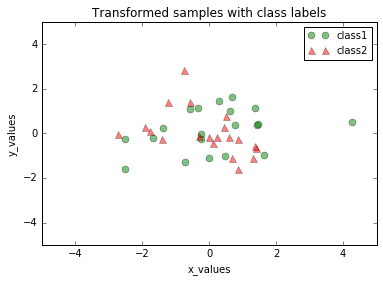

In [45]:

plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [46]:
# Compare PCA vs T-SNE vs LDA
# 3 Most popular DR techniques

# Best generic DR method is PCA (generally for unsupervised)
# Best supervised Data (Same steps as PCA except we compute the mean vectors for each of the classes)
#            LDA(Linear discriminant analysis)

# Best Visualizaion
# T-SNE
# Step 1 - Compute similarity matrix between all feature vectors
# Step 2 - Compute similarity matrix from map points
# Step 3 - Use gradient descent to minimimze distance between matrices

##### This code was written during Live session with Siraj